## 2. ロジスティック回帰
ロジスティック回帰は分類モデルであり、線形分離可能なクラスでは精度が良い。  
基本的には2クラス分類器であるが、多クラスに一般化するには、softmax回帰や1対他法などがある。  
  
正事象の確率を$p$としたとき、**オッズ比**は$\frac{p}{1-p}$と書ける。  
オッズ比の対数をとったもの(対数オッズ)を、**ロジット関数**と呼ぶ。
$$
logit(p)=\frac{p}{1-p}
$$  

このロジット関数は、0よりも大きく1よりも小さい範囲の入力値を受け取り、それらを実数の全範囲の値に変換する。  
特徴量の値と対数オッズ都の線形関係を以下のように表すことができる。  
$$
logit(p(y=1|\boldsymbol{x}))=w_0x_0+w_1x_1+\cdots+w_mx_m=\sum_{i=0}^mw_ix_i=\boldsymbol{w}^T\boldsymbol{x}
$$

データ点が特定のクラスに属している確率は、ロジット関数の逆関数であり**ロジスティックシグモイド関数**と呼ばれる。  
これは、単に**シグモイド関数**と呼ばれることもある。  
$$
\phi(z)=\frac{1}{1+e^{-z}}\\
z=\boldsymbol{w}^T\boldsymbol{x}=w_0x_0+w_1x_1+\cdots+w_mx_m
$$

クラス1に属する確率は$\phi(z)=P(y=1|\boldsymbol{x};\boldsymbol{w})$と解釈できる。  
そして、閾値を使って予測された確率を二値の指標に分類する。
$$
\hat{y}= \begin{cases}
    1 & (\phi(z) \ge 0.5) \\
    0 & (\phi(z) < 0.5)
  \end{cases}
$$

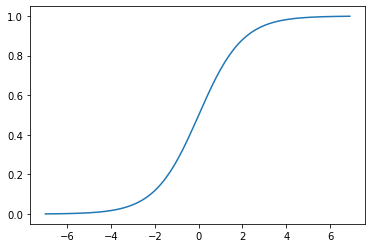

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)

plt.plot(z, phi_z)

ロジスティック回帰モデルで最大化したい尤度$L$を以下のように定義する。
$$
L(\boldsymbol{w})=P(\boldsymbol{y}|\boldsymbol{x};\boldsymbol{w})=\prod_{i=1}^nP(y^{(i)}|x^{(i)};\boldsymbol{w})=\prod_{i=1}^n\bigl(\phi(z^{(i)}) \bigr)^{y^{(i)}}\bigl(1-\phi(z^{(i)}) \bigr)^{1-y^{(i)}}
$$

対数を取ったほうが計算が簡単であり、これは**対数尤度**と呼ばれる。  
$$
J(\boldsymbol{w})=\log{L(\boldsymbol{w})}=\sum_{i=1}^n\biggl[y^{(i)}\log{\bigl(\phi(z^{(i)})\bigr)}+(1-y^{(i)})\log{\bigl(1-\phi(z^{(i)})\bigr)} \biggr]
$$

このとき、単一のデータに対するコストは、
$$
J(\phi(z),y;\boldsymbol{w})=-y\log{(\phi(z))}-(1-y)\log{(1-\phi(z))}
$$
と計算できて、$y$が0と1の場合でそれぞれかき分けると、
$$
J(\phi(z),y;\boldsymbol{w})=\begin{cases}
    -\log{(\phi(z))} & (y = 1) \\
    -\log{(1-\phi(z))} & (y = 0)
  \end{cases}
$$

となる。

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier):
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cuan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8,
                    label=cl, 
                    cmap=cmap,
                    edgecolor='black')

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, # 正則化のパラメータ、デフォルト1
                        penalty='l2', # デフォルトl2
                        # 大規模なデータなどではsag
                        # L1正則化のときはliblinear
                        solver='lbfgs', # デフォルトlbfgs、liblinear, sag, saga
                        multi_class='ovr', # multinormal, ovr
                        class_weight="balanced" # クラスサイズが不均衡の場合
                       )

lr.fit(X_train_std, y_train)

LogisticRegression(C=1, class_weight='balanced', multi_class='ovr')

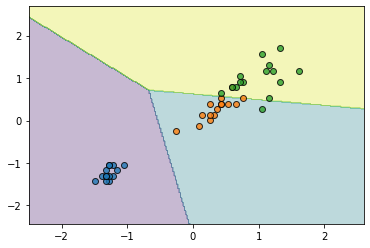

In [29]:
plot_decision_regions(X_test_std, y_test, lr)

特定のクラスに所属する確率も計算できる。

In [30]:
print(lr.predict_proba(X_test_std[:3, :]))
print(lr.predict_proba(X_test_std[:3, :]).argmax(axis=1))
print(lr.predict(X_test_std[:3, :]))

[[7.34699918e-01 2.65220905e-01 7.91771199e-05]
 [1.20431409e-04 4.32342884e-01 5.67536685e-01]
 [7.32462801e-02 7.75502696e-01 1.51251023e-01]]
[0 2 1]
[0 2 1]


### 正則化
正則化を適用するには、ロジスティック回帰のコスト関数に対して、重みを小さくするための正則化項を追加すればよい。
$$
J(\boldsymbol{w})=\sum_{i=1}^n\biggl[y^{(i)}\log{\bigl(\phi(z^{(i)})\bigr)}+(1-y^{(i)})\log{\bigl(1-\phi(z^{(i)})\bigr)} \biggr]+\frac{\lambda}{2}|\boldsymbol{w}|^2
$$

ただし、schikit-learnで実装されている正則化コスト関数は、
$$
C=\frac{1}{\lambda}
$$
として、
$$
J(\boldsymbol{w})=C\sum_{i=1}^n\biggl[y^{(i)}\log{\bigl(\phi(z^{(i)})\bigr)}+(1-y^{(i)})\log{\bigl(1-\phi(z^{(i)})\bigr)} \biggr]+\frac{1}{2}|\boldsymbol{w}|^2
$$

となっており、逆正則化パラメータ$C$の値を減らすことは、正則化の強さを高めることを意味する。

In [31]:
from sklearn.linear_model import LogisticRegressionCV

lr_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=[1,10])
lr_l2 = LogisticRegressionCV(penalty='l2', Cs=[1,10])

lr_l1.fit(X_train_std, y_train)
lr_l2.fit(X_train_std, y_train)

LogisticRegressionCV(Cs=[1, 10])

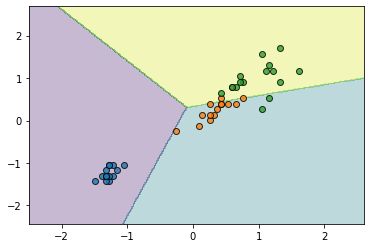

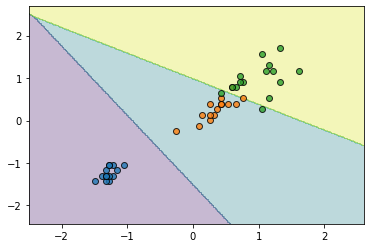

In [32]:
plot_decision_regions(X_test_std, y_test, lr_l1)
plt.show()
plot_decision_regions(X_test_std, y_test, lr_l2)
plt.show()